In [4]:
%matplotlib inline
from biocrnpyler import *

import numpy as np
import pylab as plt
from matplotlib.pyplot import figure

from biocrnpyler.chemical_reaction_network import Species, Reaction, ChemicalReactionNetwork

Chemical reaction network for the violacein pathway.

$$\text{Tryptophan (TRP)} \leftrightarrow^{VioA} \text{IPA imine}$$
$$\text{2 IPA imine} \leftrightarrow^{VioB} \text{IPA imine dimer}$$
$$\text{IPA imine dimer} \leftrightarrow^{VioE} \text{Protodeoxyviolaceinic acid (PTDVA)}$$
$$\text{Protodeoxyviolaceinic acid (PTDVA)} \leftrightarrow^{VioD} \text{Protoviolaceinic acid (PTVA)}$$
$$\text{Protoviolaceinic acid (PTVA)} \leftrightarrow^{VioC} \text{Violacein (V)}\text{        (This is the desired end-product)}$$
$$\text{Protodeoxyviolaceinic acid (PTDVA)} \leftrightarrow^{VioC} \text{Deoxyviolacein (DV)}\text{        (This is a side-reaction)}$$





In [15]:


#parameters
VioB_kb = 10
VioB_ku = 1
VioB_kcat = 450
michalis_parameters = {("michalis_menten", "VioA", "kb"):10, ("michalis_menten", "VioA", "ku"):1, ("michalis_menten", "VioA", "kcat"):203,
                       ("michalis_menten", "VioB", "kb"):VioB_kb, ("michalis_menten", "VioB", "ku"):VioB_ku, ("michalis_menten", "VioB", "kcat"):VioB_kcat*VioB_kb/VioB_ku}    


default_parameters = {"kb":10, "ku":1, "kcat":100}


#Enzyme species
VioA = Species("VioA", material_type = "enzyme")
VioB = Species("VioB", material_type = "enzyme")
VioE = Species("VioE", material_type = "enzyme")
VioD = Species("VioD", material_type = "enzyme")
VioC = Species("VioC", material_type = "enzyme")

#Pathway organic molecule species
TRP = Species("TRP", material_type = "organic_molecule")
IPA_imine = Species("IPA_imine", material_type = "organic_molecule")
IPA_imine_dimer = Species("IPA_imine_dimer", material_type = "organic_molecule")
PTDVA = Species("PTDVA", material_type = "organic_molecule")
PTVA = Species("PTVA", material_type = "organic_molecule")
DV = Species("DV", material_type = "organic_molecule")
V = Species("V", material_type = "organic_molecule")

#Default mechanisms
mech_cat = BasicCatalysis()
default_mechanisms = {mech_cat.mechanism_type:mech_cat} #mechanism_type = method


#Specific mechanisms
mech_michalis = MichalisMenten()
specific_mechanisms = {mech_michalis.mechanism_type:mech_michalis}

E1_VioA = Enzyme(enzyme = VioA, substrate = "TRP", product = "IPA_imine", mechanisms = specific_mechanisms, parameters = michalis_parameters)
E2_VioB = MultiEnzyme(enzyme = VioB, substrates = ["IPA_imine", "IPA_imine"], products = ["IPA_imine_dimer"], mechanisms = specific_mechanisms, parameters = michalis_parameters)
E3_VioE = Enzyme(enzyme = VioE, substrate = "IPA_imine_dimer", product = "PTDVA")
E4_VioD = Enzyme(enzyme = VioD, substrate = "PTDVA", product = "PTVA")
E5_VioC = Enzyme(enzyme = VioC, substrate = "PTVA", product = "V")
E5_VioC_side = Enzyme(enzyme = VioC, substrate ="PTDVA", product = "DV")



M = Mixture("Catalysis Mixture", components = [E1_VioA, E2_VioB, E3_VioE, E4_VioD, E5_VioC, E5_VioC_side], parameters = default_parameters, default_mechanisms = default_mechanisms)


CRN = M.compile_crn()

CRN.pretty_print(show_rates = True, show_attributes = True, show_materials = True)

print(CRN.pretty_print())


Species (14) = {0. enzyme[VioA], 1. TRP, 2. IPA_imine, 3. complex[TRP:enzyme[VioA]], 4. enzyme[VioB], 5. IPA_imine_dimer, 6. complex[2x_IPA_imine:enzyme[VioB]], 7. enzyme[VioE], 8. PTDVA, 9. enzyme[VioD], 10. PTVA, 11. enzyme[VioC], 12. V, 13. DV}
Reactions (8) = [
0. TRP + enzyme[VioA] <--> complex[TRP:enzyme[VioA]]        
        massaction: k_f(TRP,enzyme[VioA])=10*TRP*enzyme[VioA]
        k_r(complex[TRP:enzyme[VioA]])=1*complex[TRP:enzyme[VioA]]
1. complex[TRP:enzyme[VioA]] --> IPA_imine + enzyme[VioA]        
        massaction: k_f(complex[TRP:enzyme[VioA]])=203*complex[TRP:enzyme[VioA]]
2. 2 IPA_imine + enzyme[VioB] <--> complex[2x_IPA_imine:enzyme[VioB]]        
        massaction: k_f(IPA_imine,enzyme[VioB])=10*IPA_imine^2*enzyme[VioB]
        k_r(complex[2x_IPA_imine:enzyme[VioB]])=1*complex[2x_IPA_imine:enzyme[VioB]]
3. complex[2x_IPA_imine:enzyme[VioB]] --> IPA_imine_dimer + enzyme[VioB]        
        massaction: k_f(complex[2x_IPA_imine:enzyme[VioB]])=4500.0*complex[2x

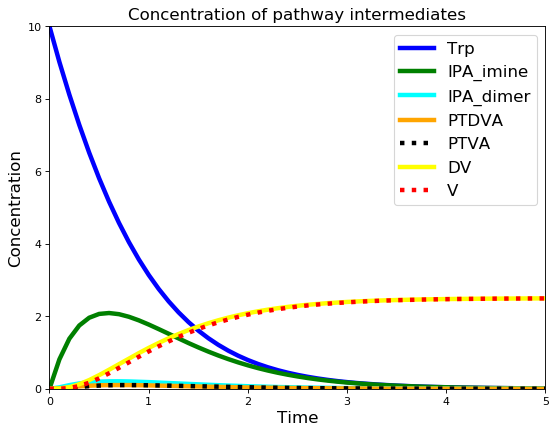

     enzyme_VioA           TRP     IPA_imine  complex_TRP_enzyme_VioA  \
0       0.150000  1.000000e+01  0.000000e+00             0.000000e+00   
1       0.103910  9.016773e+00  8.120539e-01             4.608970e-02   
2       0.107191  8.116889e+00  1.380946e+00             4.280935e-02   
3       0.110421  7.283147e+00  1.745840e+00             3.957883e-02   
4       0.113579  6.514274e+00  1.960583e+00             3.642125e-02   
..           ...           ...           ...                      ...   
995     0.150000  5.217735e-10  5.181138e-10             3.864837e-12   
996     0.150000  5.230483e-10  5.193807e-10             3.874280e-12   
997     0.150000  5.241536e-10  5.204793e-10             3.882467e-12   
998     0.150000  5.250869e-10  5.214070e-10             3.889380e-12   
999     0.150000  5.258455e-10  5.221614e-10             3.894999e-12   

     enzyme_VioB  IPA_imine_dimer  complex_2x_IPA_imine_enzyme_VioB  \
0       0.150000     0.000000e+00                   

In [17]:
# Define initial conditions for Rheostat + ATP Leak
timepoints = np.linspace(0, 100, 1000)

e = 0.15
trp = 10
x0 = {str(VioA):e, str(VioB):e, str(VioE):e, str(VioD):e, str(VioC):e, "TRP":trp}

      
      
R1 = CRN.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(timepoints, R1["TRP"], color = 'blue', lw = 4, label = 'Trp')
plt.plot(timepoints, R1["IPA_imine"], color = 'green', lw = 4, label = 'IPA_imine')
plt.plot(timepoints, R1["IPA_imine_dimer"], color = 'cyan', lw = 4, label = 'IPA_dimer')
plt.plot(timepoints, R1["PTDVA"], color = 'orange', lw = 4, label = 'PTDVA')
plt.plot(timepoints, R1["PTVA"], ":", color = 'black', lw = 4, label = 'PTVA')


plt.plot(timepoints, R1["DV"], color = 'yellow', lw = 4, label = 'DV')
plt.plot(timepoints, R1["V"], ":" , color = "red" , lw = 4, label = 'V')
plt.legend(fontsize = 15)


plt.xlim(0, 5)
plt.ylim(0, 10)
plt.title('Concentration of pathway intermediates', size = "15")
plt.xlabel("Time", fontsize = "15")
plt.ylabel("Concentration", fontsize = "15");
plt.show()

print(R1)

In [19]:
#Enzyme species
VioA = Species("VioA", material_type = "enzyme")
VioB = Species("VioB", material_type = "enzyme")
VioE = Species("VioE", material_type = "enzyme")
VioD = Species("VioD", material_type = "enzyme")
VioC = Species("VioC", material_type = "enzyme")

#Pathway organic molecule species
TRP = Species("TRP", material_type = "organic_molecule")
IPA_imine = Species("IPA_imine", material_type = "organic_molecule")
IPA_imine_dimer = Species("IPA_imine_dimer", material_type = "organic_molecule")
PTDVA = Species("PTDVA", material_type = "organic_molecule")
PTVA = Species("PTVA", material_type = "organic_molecule")
#DV = Species("DV", material_type = "organic_molecule")
V = Species("V", material_type = "organic_molecule")

#Default mechanisms
mech_cat = BasicCatalysis()
default_mechanisms = {mech_cat.mechanism_type:mech_cat} #mechanism_type = method


#Specific mechanisms
mech_michalis = MichalisMenten()
specific_mechanisms = {mech_michalis.mechanism_type:mech_michalis}

E1_VioA = Enzyme(enzyme = VioA, substrate = "TRP", product = "IPA_imine", mechanisms = specific_mechanisms, parameters = michalis_parameters)
E2_VioB = MultiEnzyme(enzyme = VioB, substrates = ["IPA_imine", "IPA_imine"], products = ["IPA_imine_dimer"], mechanisms = specific_mechanisms, parameters = michalis_parameters)
E3_VioE = Enzyme(enzyme = VioE, substrate = "IPA_imine_dimer", product = "PTDVA")
E4_VioD = Enzyme(enzyme = VioD, substrate = "PTDVA", product = "PTVA")
E5_VioC = Enzyme(enzyme = VioC, substrate = "PTVA", product = "V")
#E5_VioC_side = Enzyme(enzyme = VioC, substrate ="PTDVA", product = "DV")



M = Mixture("Catalysis Mixture", components = [E1_VioA, E2_VioB, E3_VioE, E4_VioD, E5_VioC], parameters = default_parameters, default_mechanisms = default_mechanisms)


CRN = M.compile_crn()

#CRN.pretty_print(show_rates = True, show_attributes = True, show_materials = True)
CRN.pretty_print(show_rates = True, show_attributes = True, show_materials = True)

print(CRN.pretty_print())



Species (13) = {0. enzyme[VioA], 1. TRP, 2. IPA_imine, 3. complex[TRP:enzyme[VioA]], 4. enzyme[VioB], 5. IPA_imine_dimer, 6. complex[2x_IPA_imine:enzyme[VioB]], 7. enzyme[VioE], 8. PTDVA, 9. enzyme[VioD], 10. PTVA, 11. enzyme[VioC], 12. V}
Reactions (7) = [
0. TRP + enzyme[VioA] <--> complex[TRP:enzyme[VioA]]        
        massaction: k_f(TRP,enzyme[VioA])=10*TRP*enzyme[VioA]
        k_r(complex[TRP:enzyme[VioA]])=1*complex[TRP:enzyme[VioA]]
1. complex[TRP:enzyme[VioA]] --> IPA_imine + enzyme[VioA]        
        massaction: k_f(complex[TRP:enzyme[VioA]])=203*complex[TRP:enzyme[VioA]]
2. 2 IPA_imine + enzyme[VioB] <--> complex[2x_IPA_imine:enzyme[VioB]]        
        massaction: k_f(IPA_imine,enzyme[VioB])=10*IPA_imine^2*enzyme[VioB]
        k_r(complex[2x_IPA_imine:enzyme[VioB]])=1*complex[2x_IPA_imine:enzyme[VioB]]
3. complex[2x_IPA_imine:enzyme[VioB]] --> IPA_imine_dimer + enzyme[VioB]        
        massaction: k_f(complex[2x_IPA_imine:enzyme[VioB]])=4500.0*complex[2x_IPA_imi

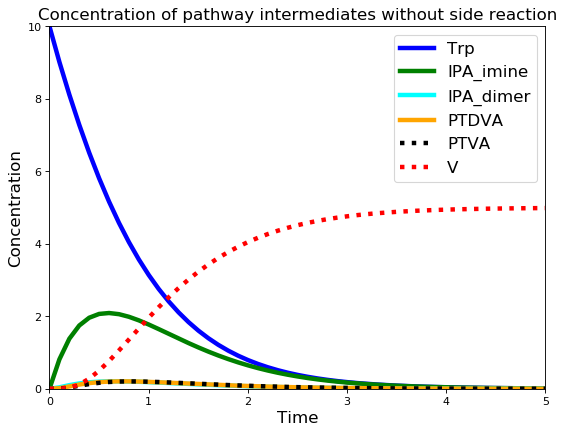

     enzyme_VioA           TRP     IPA_imine  complex_TRP_enzyme_VioA  \
0       0.150000  1.000000e+01  0.000000e+00             0.000000e+00   
1       0.103910  9.016773e+00  8.120539e-01             4.608970e-02   
2       0.107191  8.116889e+00  1.380946e+00             4.280935e-02   
3       0.110421  7.283147e+00  1.745840e+00             3.957883e-02   
4       0.113579  6.514274e+00  1.960583e+00             3.642125e-02   
..           ...           ...           ...                      ...   
995     0.150000  4.263846e-14  4.255124e-14             3.158313e-16   
996     0.150000  4.258943e-14  4.250230e-14             3.154681e-16   
997     0.150000  4.254039e-14  4.245337e-14             3.151049e-16   
998     0.150000  4.249136e-14  4.240444e-14             3.147417e-16   
999     0.150000  4.244233e-14  4.235550e-14             3.143785e-16   

     enzyme_VioB  IPA_imine_dimer  complex_2x_IPA_imine_enzyme_VioB  \
0       0.150000     0.000000e+00                   

In [20]:
# Define initial conditions for Rheostat + ATP Leak
timepoints = np.linspace(0, 100, 1000)

e = 0.15
trp = 10
x0 = {str(VioA):e, str(VioB):e, str(VioE):e, str(VioD):e, str(VioC):e, "TRP":trp}

      
      
R = CRN.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.plot(timepoints, R["TRP"], color = 'blue', lw = 4, label = 'Trp')
plt.plot(timepoints, R["IPA_imine"], color = 'green', lw = 4, label = 'IPA_imine')
plt.plot(timepoints, R["IPA_imine_dimer"], color = 'cyan', lw = 4, label = 'IPA_dimer')
plt.plot(timepoints, R["PTDVA"], color = 'orange', lw = 4, label = 'PTDVA')
plt.plot(timepoints, R["PTVA"], ":", color = 'black', lw = 4, label = 'PTVA')


#plt.plot(timepoints, R["DV"], color = 'yellow', lw = 4, label = 'DV')
plt.plot(timepoints, R["V"], ":" , color = "red" , lw = 4, label = 'V')
plt.legend(fontsize = 15)


plt.xlim(0, 5)
plt.ylim(0, 10)
plt.title('Concentration of pathway intermediates without side reaction', size = "15")
plt.xlabel("Time", fontsize = "15")
plt.ylabel("Concentration", fontsize = "15");
plt.show()

print(R)

In [ ]:
##Not used (yet)


#Gene transcription and translation for violacein pathawy


#Define dna, rna and protein species
dVioA = Species("dA", material_type = "dna")
rVioA = Species("rA"), material_type = "rna")
pVioA = Species("pA", material_type = "protein")

dVioB = Species("dB", material_type = "dna")
rVioB = Species("rB"), material_type = "rna")
pVioB = Species("pB", material_type = "protein")

dVioE = Species("dE", material_type = "dna")
rVioE = Species("rE"), material_type = "rna")
pVioE = Species("pE", material_type = "protein")

dVioD = Species("dD", material_type = "dna")
rVioD = Species("rD"), material_type = "rna")
pVioD = Species("pD", material_type = "protein")

dVioC = Species("dC", material_type = "dna")
rVioC = Species("rC"), material_type = "rna")
pVioC = Species("pC", material_type = "protein")

dVioC_Side = Species("dCs", material_type = "dna")
rVioC_Side = Species("rCs"), material_type = "rna")
pVioC_Side = Species("pCs", material_type = "protein")

#Create dna, rna and protein components

dA = Enzyme(enzyme = dVioA, substrate = None, product = rVioA)
rA = Enzyme(enzyme = rVioA, substrate = None, product = pVioA)

dB = Enzyme(enzyme = dVioB, substrate = None, product = rVioB)
rB = Enzyme(enzyme = rVioB, substrate = None, product = pVioB)

dE = Enzyme(enzyme = dVioE, substrate = None, product = rVioE)
rE = Enzyme(enzyme = rVioE, substrate = None, product = pVioE)

dD = Enzyme(enzyme = dVioD, substrate = None, product = rVioD)
rD = Enzyme(enzyme = rVioD, substrate = None, product = pVioD)

dC = Enzyme(enzyme = dVioC, substrate = None, product = rVioC)
rC = Enzyme(enzyme = rVioC, substrate = None, product = pVioC)

dCs = Enzyme(enzyme = dVioC_Side, substrate = None, product = rVioC_Side)
rCs = Enzyme(enzyme = rVioC_Side, substrate = None, product = pVioC_Side)





In [ ]:
specific_parameters = {("michalis_menten", "VioA", "kb"):10, ("michalis_menten", "VioA", "ku"):1, ("michalis_menten", "VioA", "kcat"):203,
                       ("michalis_menten", "VioB", "kb"):10, ("michalis_menten", "VioB", "ku"):1, ("michalis_menten", "VioB", "kcat"):4500,
                       ("michalis_menten", "VioE", "kb"):10, ("michalis_menten", "VioE", "ku"):1, ("michalis_menten", "VioE", "kcat"):100,
                       ("michalis_menten", "VioD", "kb"):10, ("michalis_menten", "VioD", "ku"):1, ("michalis_menten", "VioD", "kcat"):100,
                       ("michalis_menten", "VioC", "kb"):10, ("michalis_menten", "VioC", "ku"):1, ("michalis_menten", "VioC", "kcat"):100}    